In [1]:
import pandas as pd
import dask.distributed as dd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, CatBoostRegressor

In [2]:
winequality_red = pd.read_csv("data/winequality-red.csv", delimiter=";")
winequality_white = pd.read_csv("data/winequality-white.csv", delimiter=";")
winequality_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


So the goal here is to make a prediction of the quality. 

In [3]:
winequality_white.columns == winequality_red.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [4]:
winequality_white["White"]=1
winequality_red["White"]=0
df = pd.concat((winequality_red, winequality_white))
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,White
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [5]:
target = df["quality"]
df.drop(columns="quality", inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,White
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [7]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,White
1130,9.1,0.60,0.00,1.90,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,0
155,7.4,0.24,0.42,14.00,0.066,48.0,198.0,0.99790,2.89,0.42,8.9,1
4788,6.4,0.31,0.31,12.90,0.045,55.0,161.0,0.99546,3.02,0.59,10.2,1
1642,7.3,0.19,0.49,15.55,0.058,50.0,134.0,0.99980,3.42,0.36,9.1,1
1890,7.7,0.30,0.42,14.30,0.045,45.0,213.0,0.99910,3.18,0.63,9.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4113,6.1,0.17,0.29,1.10,0.041,32.0,92.0,0.99036,3.26,0.57,11.2,1
3574,8.1,0.17,0.21,1.60,0.036,24.0,119.0,0.99396,3.18,0.52,10.1,1
4248,5.9,0.14,0.20,1.60,0.040,26.0,114.0,0.99105,3.25,0.45,11.4,1
876,6.9,0.36,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,1


In [8]:
categorical_features = np.where(df[list(df.columns)].dtypes != float)[0]
categorical_features

array([11])

In [9]:

params = {
    "iterations":10000,
    "learning_rate":0.005,
    "cat_features":categorical_features,
    "depth":3,
}
cat_reg_model = CatBoostRegressor(**params)
cat_reg_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model =True,
    plot=True
    )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8753822	test: 0.8595893	best: 0.8595893 (0)	total: 47.9ms	remaining: 7m 59s
1:	learn: 0.8744352	test: 0.8585986	best: 0.8585986 (1)	total: 48.5ms	remaining: 4m 2s
2:	learn: 0.8734944	test: 0.8576340	best: 0.8576340 (2)	total: 49.1ms	remaining: 2m 43s
3:	learn: 0.8725532	test: 0.8567621	best: 0.8567621 (3)	total: 49.6ms	remaining: 2m 3s
4:	learn: 0.8715717	test: 0.8557377	best: 0.8557377 (4)	total: 50.2ms	remaining: 1m 40s
5:	learn: 0.8706213	test: 0.8547554	best: 0.8547554 (5)	total: 50.7ms	remaining: 1m 24s
6:	learn: 0.8696851	test: 0.8538148	best: 0.8538148 (6)	total: 51.4ms	remaining: 1m 13s
7:	learn: 0.8688108	test: 0.8529568	best: 0.8529568 (7)	total: 60.6ms	remaining: 1m 15s
8:	learn: 0.8680202	test: 0.8521569	best: 0.8521569 (8)	total: 61.4ms	remaining: 1m 8s
9:	learn: 0.8670446	test: 0.8511694	best: 0.8511694 (9)	total: 62.6ms	remaining: 1m 2s
10:	learn: 0.8661670	test: 0.8503216	best: 0.8503216 (10)	total: 63.2ms	remaining: 57.4s
11:	learn: 0.8652723	test: 0.849449

In [10]:
import shap


from catboost import CatBoostClassifier, Pool

shap_Values = cat_reg_model.get_feature_importance(
    Pool(X_test, label=y_test, cat_features=categorical_features), type="ShapValues"
)

expected_value = shap_Values[0,-1]
shap_values = shap_Values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


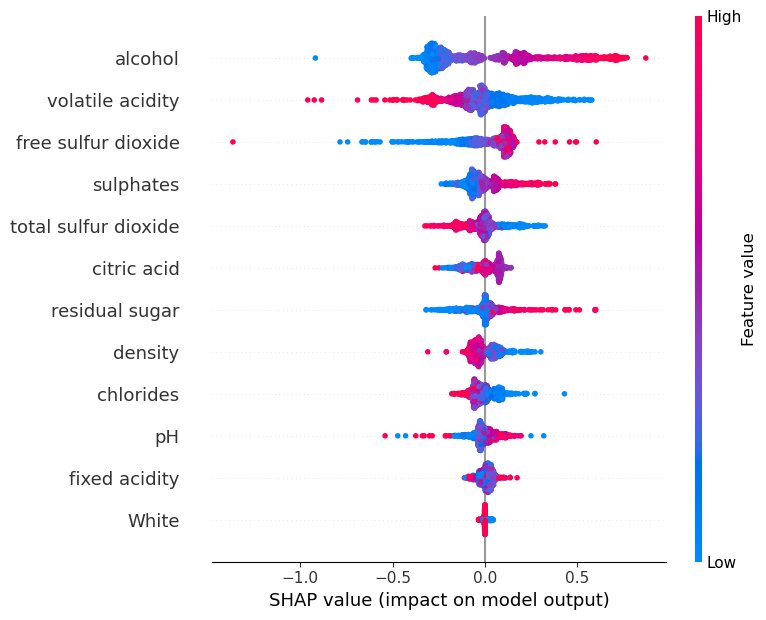

In [11]:
shap.summary_plot(shap_values, X_test)

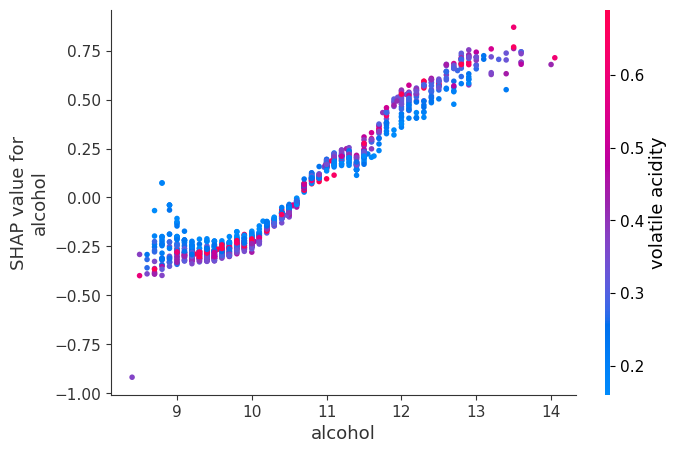

In [12]:
shap.dependence_plot("alcohol", shap_values, X_test)

In [13]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler


In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

NameError: name 'X_val' is not defined